In [18]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기


In [2]:
abalone = pd.read_csv('data/abalone.csv')
abalone.head()

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
abalone.shape

(4177, 9)

In [4]:
abalone.dtypes

Type              object
LongestShell     float64
Diameter         float64
Height           float64
WholeWeight      float64
ShuckedWeight    float64
VisceraWeight    float64
ShellWeight      float64
Rings              int64
dtype: object

# 데이터셋 설명

`abalone` 데이터셋은 전복(Abalone)의 물리적 특성과 나이를 나타내는 변수들로 구성되어 있습니다. 

이 데이터셋은 종종 전복의 나이를 예측하거나, 전복의 물리적 특성과 관련된 분석을 수행하는 데 사용됩니다. 각 변수의 의미를 설명하면 다음과 같습니다.

- Type (object)
  - 설명: 전복의 성별을 나타내는 범주형 변수입니다.
  - 범주:
    - M: Male (수컷)
    - F: Female (암컷)
    - I: Infant (미성숙)
  - 용도: 성별에 따라 전복의 특성과 나이 예측 모델에 영향을 줄 수 있습니다.

- LongestShell (float64)
  - 설명: 전복의 껍질 길이를 나타내는 변수입니다. 단위는 밀리미터(mm)입니다.
  - 용도: 전복의 크기를 나타내는 중요한 변수 중 하나로, 전복의 성장 상태나 나이와 상관관계가 있을 수 있습니다.

- Diameter (float64)
  - 설명: 전복의 직경을 나타내는 변수입니다. 단위는 밀리미터(mm)입니다. 껍질을 수평으로 자른 후의 직경입니다.
  - 용도: 전복의 크기를 나타내는 또 다른 중요한 변수로, 나이와의 상관관계를 분석할 때 사용됩니다.

- Height (float64)
  - 설명: 전복의 높이를 나타내는 변수입니다. 단위는 밀리미터(mm)입니다. 껍질을 수평으로 자른 후의 높이로, 껍질 두께를 포함합니다.
  - 용도: 전복의 전체적인 크기와 체적을 추정하는 데 사용될 수 있습니다.

- WholeWeight (float64)
  - 설명: 전복의 전체 무게를 나타내는 변수입니다. 단위는 그램(g)입니다.
  - 용도: 전복의 건강 상태와 나이, 성숙도 등을 분석하는 데 중요한 변수입니다.

- ShuckedWeight (float64)
  - 설명: 껍질을 제거한 후의 전복의 무게를 나타내는 변수입니다. 단위는 그램(g)입니다.
  - 용도: 전복의 식용 부분의 무게를 나타내며, 상품성이나 품질을 평가하는 데 사용될 수 있습니다.

- VisceraWeight (float64)
  - 설명: 전복의 내장 무게를 나타내는 변수입니다. 단위는 그램(g)입니다.
  - 용도: 전복의 건강 상태나 성숙도를 분석하는 데 사용할 수 있는 변수입니다.

- ShellWeight (float64)
  - 설명: 전복의 껍질 무게를 나타내는 변수입니다. 단위는 그램(g)입니다. 껍질이 말린 상태의 무게입니다.
  - 용도: 전복의 나이와 성장 상태를 추정하는 데 사용될 수 있습니다. 껍질의 무게는 나이와 상관관계가 있을 수 있습니다.

- Rings (int64)
  - 설명: 전복의 나이를 측정하는 데 사용되는 변수로, 껍질에 있는 고리의 개수를 나타냅니다.
  - 용도: 전복의 나이를 추정하는 데 직접적으로 사용됩니다. 일반적으로 전복의 나이는 (Rings + 1.5)로 추정되며, 단위는 연(년)입니다.


요약

Type: 전복의 성별(수컷, 암컷, 미성숙).

LongestShell, Diameter, Height: 전복의 크기와 모양을 나타내는 변수들.

WholeWeight, ShuckedWeight, VisceraWeight, ShellWeight: 전복의 전체 무게와 구성 요소별 무게.

Rings: 전복의 나이를 측정하는 데 사용되는 변수.

# 목표 변수 정의

`Rings` 열을 기준으로 이진 분류를 수행할 목표 변수를 정의한다.

`Rings` 가 10 이상인 경우를 1, 그 외를 0으로 이진화한다.

In [5]:
# 목표 변수 이진화
abalone['target'] = (abalone['Rings'] >= 10).astype(int)

# 필요 없는 `Rings` 열 제거
abalone = abalone.drop(columns=['Rings'])

# 확인
print(abalone['target'].value_counts())

target
0    2096
1    2081
Name: count, dtype: int64


# 데이터 전처리
범주형 데이터 `Sex`를 원-핫 인코딩으로 변환하고, [원-핫 인코딩](https://velog.io/@pheol9166/%EC%9B%90-%ED%95%AB-%EC%9D%B8%EC%BD%94%EB%94%A9One-hot-Encoding)

데이터를 학습 및 테스트 세트로 분리한다.

In [6]:
# 범주형 데이터를 원-핫 인코딩 (성별(Type) 열)
abalone = pd.get_dummies(abalone, columns=['Type'], drop_first=True)

# 입력 변수(X)와 목표 변수(y) 분리
X = abalone.drop(columns=['target'])
y = abalone['target']

# 학습 데이터와 테스트 데이터로 분리
X_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=12)

# `DecisionTreeClassifier`로 모델 학습

In [7]:
# 모델 학습
model = DecisionTreeClassifier(random_state=12)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=12)

In [10]:
# 예측
y_pred = model.predict(x_test)

In [11]:
# 성능 평가
print('Accuracy : ', accuracy_score(y_test,y_pred))
print('Classification Report : \n',classification_report(y_test,y_pred))

Accuracy :  0.7216905901116427
Classification Report : 
               precision    recall  f1-score   support

           0       0.72      0.73      0.72       625
           1       0.73      0.71      0.72       629

    accuracy                           0.72      1254
   macro avg       0.72      0.72      0.72      1254
weighted avg       0.72      0.72      0.72      1254



# 시각화

## 결정 트리 시각화

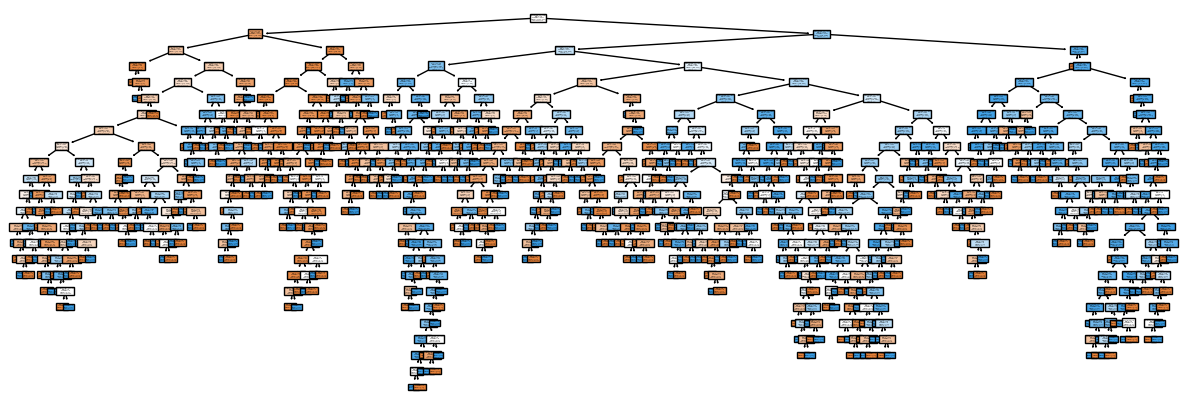

In [14]:
# 결정 트리 시각화
plt.figure(figsize=(15,5))
plot_tree(model,filled=True,feature_names=X.columns,class_names=['Not 10+', '10+'])
plt.show()

## 특성의 중요도 시각화

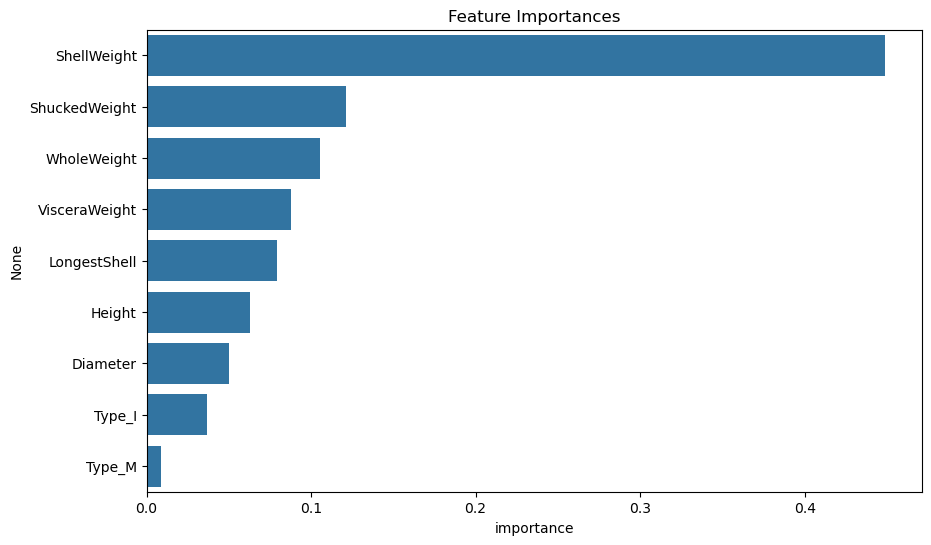

In [19]:
# 특성 중요도 추출
feature_importances = pd.DataFrame(
    model.feature_importances_,
    index=X.columns,
    columns=['importance']
).sort_values('importance',ascending=False)

# 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['importance'], y=feature_importances.index)
plt.title('Feature Importances')
plt.show()

## 주요 특성의 분포 시각화

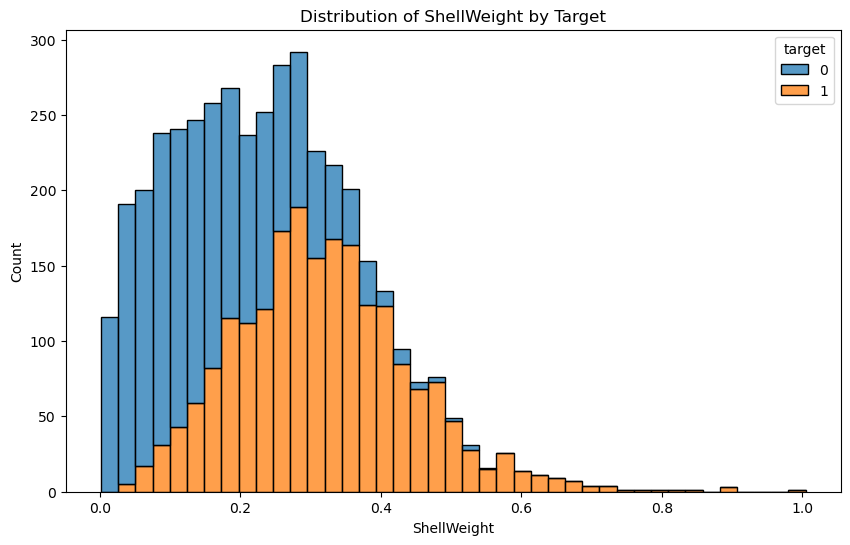

In [25]:
# 주요 특성 분포 시각화 (예: WholeWeight)
plt.figure(figsize=(10, 6))
sns.histplot(data=abalone, x='ShellWeight', hue='target', multiple='stack')
plt.title('Distribution of ShellWeight by Target')
plt.xlabel('ShellWeight')
plt.ylabel('Count')
plt.show()

## 특성 간 관계 시각화

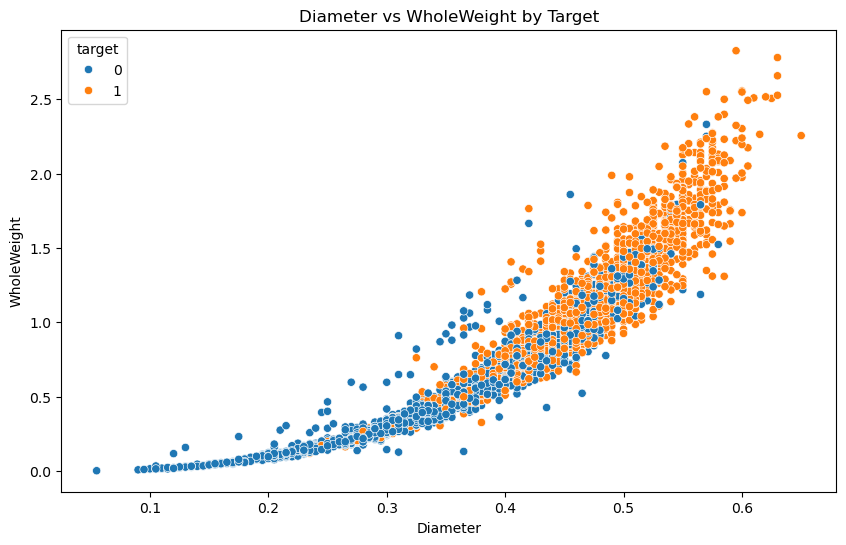

In [27]:
# 주요 특성 두 개 간의 관계 시각화 (예: Diameter vs WholeWeight)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=abalone, x='Diameter', y='WholeWeight', hue='target')
plt.title('Diameter vs WholeWeight by Target')
plt.xlabel('Diameter')
plt.ylabel('WholeWeight')
plt.show()
